# DOES INTERNET GROWTH HAS CORRELATION WITH ADOLESCENT FERTILITY RATE?

#### Import libraries

In [ ]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go


# Growth of internet data: https://ourworldindata.org/internet
# Adolescent fertility rate data: https://data.worldbank.org/indicator/SP.ADO.TFR

#### Read and clean Internet Growth Data

In [2]:
# Reading fertility data
pregnancy = pd.read_excel('C:/Users/PAVILION/Documents/UDACITY_BERTLESMAN/Project/HackatonWomen/adolescent/ado_data.xls', sheetname='Data')
clean_data= pregnancy.drop(['Indicator Name','Indicator Code'], axis=1) #Drop unuseful columns
clean_data=clean_data.iloc[:,:59] 

clean_data=clean_data.dropna() #Drop null values

clean_data2= clean_data.drop(clean_data.iloc[:,2:38],axis=1)  #Select only years from 1996-2015
clean_data2=clean_data2.iloc[:,:-1]
clean_data2.head()

,Country Name,Country Code,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,47.669200,47.304000,46.067000,44.830000,43.593000,42.3560,41.119000,39.667600,...,35.313400,33.862000,32.792000,31.72200,30.652000,29.582000,28.512000,27.095000,25.678000,24.261000
1,Afghanistan,AFG,164.968200,165.228000,161.469000,157.710000,153.951000,150.1920,146.433000,140.625600,...,123.203400,117.396000,111.141400,104.88680,98.632200,92.377600,86.123000,81.790800,77.458600,73.126400
2,Angola,AGO,204.600000,202.500000,200.566400,198.632800,196.699200,194.7656,192.832000,190.511400,...,183.549600,181.229000,178.184200,175.13940,172.094600,169.049800,166.005000,163.121800,160.238600,157.355400
3,Albania,ALB,19.210600,19.330000,19.232400,19.134800,19.037200,18.9396,18.842000,18.765000,...,18.534000,18.457000,18.911600,19.36620,19.820800,20.275400,20.730000,20.717400,20.704800,20.692200
5,Arab World,ARB,58.765736,56.590186,55.740068,54.932888,54.169817,53.3134,52.485719,52.034597,...,50.877275,50.543387,50.316994,50.10461,49.900118,49.723757,49.539074,49.111244,48.647539,48.114552


#### Visualization of the data

Text(0.5,1,'Adolescent Pregnancy over the years')

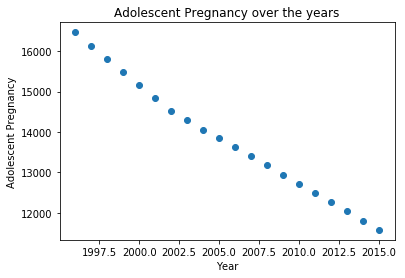

In [22]:
data= clean_data2.values #Get a numpy array
x= [i for i in range(1996,2016)]
ado_pregnancy= np.sum(data[:,2:],axis=0) #Suming data to get a worldwide value

# Make a scatter plot to reflect the change of pregnancy in adolescents over the years
%matplotlib inline
plt.scatter(x,ado_pregnancy)
plt.xlabel('Year')
plt.ylabel('Adolescent Pregnancy')
plt.title('Adolescent Pregnancy over the years')

#### Reading and cleaning internet growth data

In [4]:
# Read internet growth data
internet= pd.read_csv('C:/Users/PAVILION/Documents/UDACITY_BERTLESMAN/Project/HackatonWomen/internet.csv', 
                        encoding='utf-8')
clean_int= internet.drop(['Code'],axis=1)

#Here we transform the dataset to get a visualization similar to first one
#Only select years from 1996 to 2015 too

asia= clean_int[clean_int.Entity == 'East Asia & Pacific']
europe= clean_int[clean_int.Entity == 'Europe & Central Asia']
latin= clean_int[clean_int.Entity == 'Latin America & Caribbean']
africa= clean_int[clean_int.Entity == 'Middle East & North Africa']
north= clean_int[clean_int.Entity == 'North America']
south= clean_int[clean_int.Entity == 'South Asia']
saharan= clean_int[clean_int.Entity == 'Sub-Saharan Africa']

one= np.append('East Asia & Pacific',asia.values[4:,2])
one=one.reshape(1,one.shape[0])
two= np.append('Europe & Central Asia',europe.values[5:,2])
two=two.reshape(1,two.shape[0])
three= np.append('Latin America & Caribbean',latin.values[4:,2])
three=three.reshape(1,three.shape[0])
four= np.append('Middle East & North Africa',africa.values[2:,2])
four=four.reshape(1,four.shape[0])
five= np.append('North America',north.values[6:,2])
five=five.reshape(1,five.shape[0])
six= np.append('South Asia',south.values[4:,2])
six=six.reshape(1,six.shape[0])
seven= np.append('Sub-Saharan Africa',saharan.values[:,2])
seven=seven.reshape(1,seven.shape[0])

# Reaggregate the data
todo= np.append(one,two,axis=0)
todo=np.append(todo,three,axis=0)
todo=np.append(todo,four,axis=0)
todo=np.append(todo,five,axis=0)
todo=np.append(todo,six,axis=0)
todo=np.append(todo,seven,axis=0)
print(todo.shape)

(7, 21)


In [33]:
# Create the new dataset that has the same format that the 'pregnancy in adolescents' one 
col=['Region']
for i in range (1996,2016):
    col.append(i)
print(col)
int_access= pd.DataFrame(todo,columns=col)
int_access.shape

['Region', 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


(7, 21)

In [35]:
# Visualize first rows of the clean dataset
int_access.head()

,Region,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,East Asia & Pacific,9.1211e+06,2.14336e+07,3.77754e+07,6.90314e+07,1.14411e+08,1.49704e+08,1.87233e+08,2.21345e+08,2.66393e+08,...,3.56617e+08,4.48706e+08,5.4942e+08,6.46375e+08,7.54628e+08,8.2914e+08,9.10466e+08,9.94101e+08,1.05822e+09,1.1356e+09
1,Europe & Central Asia,1.57961e+07,2.88556e+07,4.67419e+07,7.95861e+07,1.13651e+08,1.41667e+08,1.99506e+08,2.4605e+08,2.8155e+08,...,3.33382e+08,3.8364e+08,4.17657e+08,4.47801e+08,4.98934e+08,5.25517e+08,5.68226e+08,5.97322e+08,6.28357e+08,6.51397e+08
2,Latin America & Caribbean,1.52634e+06,3.06266e+06,6.27591e+06,1.06362e+07,2.05299e+07,3.01451e+07,4.80722e+07,6.18815e+07,8.00107e+07,...,1.18301e+08,1.36831e+08,1.54885e+08,1.836e+08,2.07803e+08,2.38327e+08,2.64582e+08,2.86631e+08,3.05474e+08,3.44699e+08
3,Middle East & North Africa,245630,676369,1.47662e+06,2.84009e+06,5.33506e+06,6.66944e+06,1.22939e+07,1.70995e+07,2.83797e+07,...,4.17354e+07,5.4382e+07,6.92237e+07,8.15282e+07,9.57863e+07,1.08924e+08,1.25403e+08,1.41692e+08,1.65314e+08,1.85348e+08
4,North America,4.62733e+07,6.34927e+07,9.058e+07,1.11092e+08,1.3734e+08,1.58569e+08,1.88422e+08,1.99351e+08,2.10753e+08,...,2.29296e+08,2.50049e+08,2.50579e+08,2.44852e+08,2.49117e+08,2.45897e+08,2.63516e+08,2.56106e+08,2.63777e+08,2.71351e+08


In [7]:
#Getting the numpy array
int_ac_values= int_access.values
int_ac_values= np.sum(int_ac_values[:,1:],axis=0)
int_ac_values.shape

(20,)

#### VISUALIZATION OF INTERNET GROWTH OVER THE YEARS

Text(0.5,1,'Internet connection over the years')

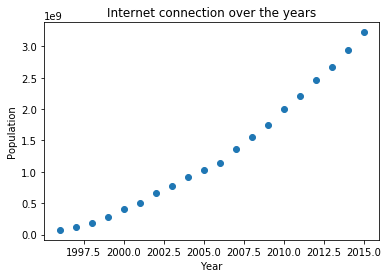

In [21]:
# Make a scatter plot showing the growth of people with internet connection over the years

x= [i for i in range(1996,2016)]
%matplotlib inline
plt.scatter(x,int_ac_values)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Internet connection over the years')

#### Visualization of the two datasets

In [26]:
# To be able to show all information in bubble graph, re-scale the values of pregnancy in adolescents
# The scale is 0.02
size=[]
for i in ado_pregnancy:
    i=i/200  #A scale of 0.02 for the circles
    i=int(round(i,0))
    size.append(i)

In [29]:
#Make a bubble graph using plotly, X will be the years, Y growth of internet and bubble size
#adolescents' Pregnancy

py.offline.init_notebook_mode(connected=True)
trace0 = go.Scatter(
    x=x,
    y=int_ac_values,
    mode='markers',
    marker=dict(
        size=size,
    )
)

data = [trace0]
layout = go.Layout(
        title='Internet Connection VS. Adolescent Pregnancy Over the Years',
    xaxis=dict(
        title='Years 1996-2015',
    ),
    yaxis=dict(
        title='Population with internet connection (Billions)',
    ),showlegend=True)
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(data, filename='InternetVsPregnancy')

Text(0.5,1,'Internet connection vs. adolescent pregnancy')

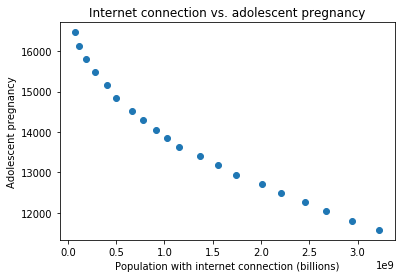

In [23]:
#Also show a scatter plot of internet growth vs. adolescent pregnancy withouth showing the years

plt.scatter(int_ac_values,ado_pregnancy)
plt.xlabel('Population with internet connection (billions)')
plt.ylabel('Adolescent pregnancy')
plt.title('Internet connection vs. adolescent pregnancy')

The images show a correlation bewtween internet growth and adolescent fertility rate. An increase in the population with access to internet correlates with a decrease in pregnancy rates in adolescents.
Possible explanation would be that women can have better information about this topic thanks to internet; however, we cannot prove causation.

Resources:
    * Growth of internet data: https://ourworldindata.org/internet
    * Adolescent fertility rate data: https://data.worldbank.org/indicator/SP.ADO.TFR